In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 4.6 MB/s 
     |████████████████████████████████| 1.3 MB 64.6 MB/s 
     |████████████████████████████████| 4.9 MB 57.7 MB/s 
     |████████████████████████████████| 432 kB 67.0 MB/s 
     |████████████████████████████████| 163 kB 71.3 MB/s 
     |████████████████████████████████| 212 kB 70.2 MB/s 
     |████████████████████████████████| 115 kB 67.9 MB/s 
     |████████████████████████████████| 127 kB 76.7 MB/s 
     |████████████████████████████████| 6.6 MB 56.0 MB/s 
Mounted at /content/gdrive


In [ ]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY', '82f95119c67749218e35fcd6f3d3fd13')

In [ ]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [ ]:
results = search_images_bing(key, 'ice cream sandwich')
ims = results.attrgot('contentUrl')
len(ims)

150

In [ ]:
#hide
ims = ['https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/blueberry-icecream-recipe1-1652730148.jpg?crop=1xw:1xh;center,top&resize=640:*']

In [ ]:
dest = 'images/icecream.jpg'
download_url(ims[0], dest)

Path('images/icecream.jpg')

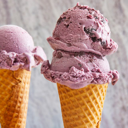

In [ ]:
im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
icecream_types = 'sandwich','mint chocolate chip','blue moon'
path = Path('ice cream')

In [ ]:
if not path.exists():
    path.mkdir()
    for o in icecream_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} ice_cream')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [ ]:
fns = get_image_files(path)
fns

(#446) [Path('ice cream/sandwich/2174f6ca-4456-4522-a96b-4b72213fd7ec.jpg'),Path('ice cream/sandwich/9c981e5b-e162-4534-b831-9abd59e63c5e.jpg'),Path('ice cream/sandwich/e286240e-5c71-442a-b58f-be3b51e7cc13.jpeg'),Path('ice cream/sandwich/3bd4fc6a-01e3-4435-9635-eba244381ae0.jpg'),Path('ice cream/sandwich/13a8f812-d891-4c72-b466-7e05055b743b.jpeg'),Path('ice cream/sandwich/1aaa83c3-f9ba-4c4c-9cc7-c2625b56aaf1.jpg'),Path('ice cream/sandwich/b8975599-70e1-4500-9092-a7aaad5388c0.jpg'),Path('ice cream/sandwich/463ede51-7b48-4c31-957f-998e0fc731fc.jpg'),Path('ice cream/sandwich/d367020f-2fe4-4898-8ca1-ef55678eb8fc.jpg'),Path('ice cream/sandwich/6e729639-6696-44c2-80c4-dccbed7e15fd.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#2) [Path('ice cream/blue moon/c518667d-fdde-4a1e-a17b-0cadb680bc9f.jpg'),Path('ice cream/blue moon/1d292f16-0684-4189-9607-310727d4b0de.jpg')]

In [ ]:
failed.map(Path.unlink);

In [ ]:
icecream_dlc = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = icecream_dlc.dataloaders(path)

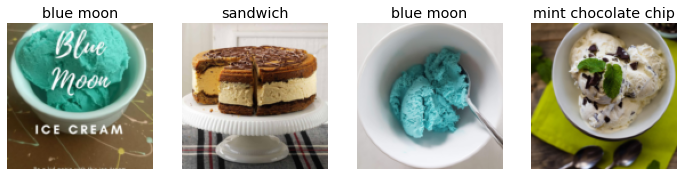

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

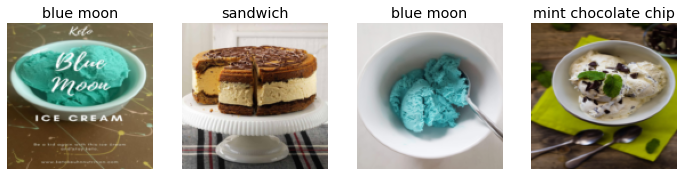

In [ ]:
icecream_dlc = icecream_dlc.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = icecream_dlc.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

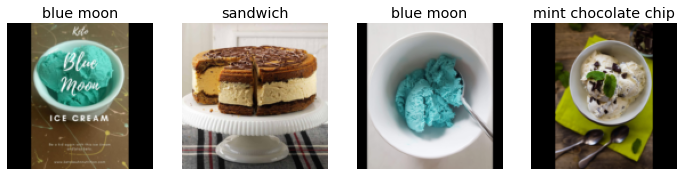

In [ ]:
icecream_dlc = icecream_dlc.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = icecream_dlc.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

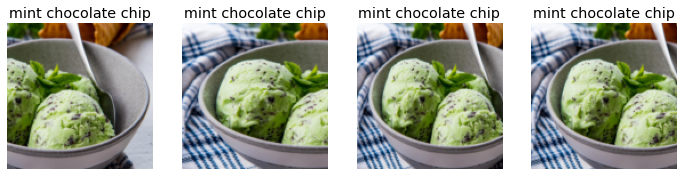

In [ ]:
icecream_dlc = icecream_dlc.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = icecream_dlc.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

### Data Augmentation

In [ ]:
icecream_dlc = icecream_dlc.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = icecream_dlc.dataloaders(path)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


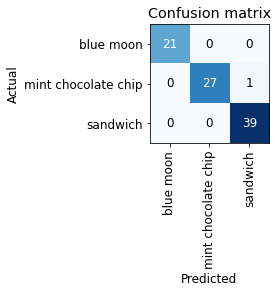

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

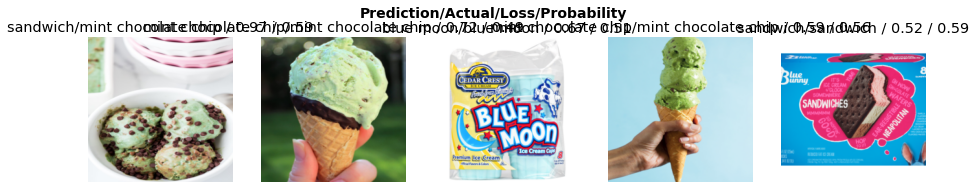

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
#hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('images/dog_ifollow.jpg')

('sandwich', TensorBase(2), TensorBase([0.1248, 0.0026, 0.8726]))

In [ ]:
learn_inf.dls.vocab

['blue moon', 'mint chocolate chip', 'sandwich']

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['images/dog_ifollow.jpg'])

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: sandwich; Probability: 0.8726')

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select your icecream dog!'), 
      btn_upload, btn_run, out_pl, lbl_pred])